# Spot.jl 

Spot.jl is a wrapper for the [Spot](https://spot.lrde.epita.fr/index.html) library. 

It is using [Cxx.jl](https://github.com/JuliaInterop/Cxx.jl) under the hood and any Spot function can be used in Julia via the Cxx interface. A few functions have been reimplemented to manipulate automatas as pure Julia objects (e.g. `DeterministicRabinAutomata`). 

For more extensive tutorials see the original [Spot documentation](https://spot.lrde.epita.fr/tut.html).


In [1]:
using Spot

┌ Info: Precompiling Spot [f11abc24-ce50-11e8-2475-af6658d13f2b]
└ @ Base loading.jl:1186
┌ Info: Recompiling stale cache file C:\Users\Maxime\.julia\compiled\v1.1\Cxx\ESGkI.ji for Cxx [a0b5b9ef-44b7-5148-a2d1-f6db19f3c3d2]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file C:\Users\Maxime\.julia\compiled\v1.1\MetaGraphs\KfBxe.ji for MetaGraphs [626554b9-1ddb-594c-aa3c-2596fe9399a5]
└ @ Base loading.jl:1184


## LTL Formulas

In [2]:
safety = ltl"!crash U goal" 
surveillance = ltl"G (F (a & (F (b & Fc))))" 

"GF(a & F(b & Fc))"

## Conversion to Automata

use the `LTLtranslator` constructor to specify the translation options, then use the `translate` to convert the LTL formula into an automata.

`LTLTranslator`:
- `tgba::Bool = true`  outputs Transition-based Generalized Büchi Automata
- `buchi::Bool = false` outputs state-based Büchi automata
- `monitor::Bool = false` outputs monitors
- `deterministic::Bool = true` combined with generic, will do whatever it takes to produce a deterministic automaton, and may use any acceptance condition
- `generic::Bool = true` 
- `parity::Bool = true` combined with deterministic, will produce a deterministic automaton with parity acceptance
- `state_based_acceptance::Bool` = true define the acceptance using states

┌ Error: mktempdir cleanup
│   exception = (Base.IOError("unlink: resource busy or locked (EBUSY)", -4082), Union{Ptr{Nothing}, InterpreterIP}[Ptr{Nothing} @0x000000043a2de8d5, Ptr{Nothing} @0x000000043a2af057, Ptr{Nothing} @0x000000050b0f1794, Ptr{Nothing} @0x0000000036188f7b, Ptr{Nothing} @0x0000000036188be0, Ptr{Nothing} @0x000000003618934a, Ptr{Nothing} @0x000000043a2924a5, Ptr{Nothing} @0x000000043a292e25, Ptr{Nothing} @0x000000003618246c, Ptr{Nothing} @0x0000000036182a8d, Ptr{Nothing} @0x0000000036180eb4, Ptr{Nothing} @0x000000043a2924a5, Ptr{Nothing} @0x000000043a293fa6, Ptr{Nothing} @0x000000003617e2f4, Ptr{Nothing} @0x000000043a2924a5, Ptr{Nothing} @0x000000043a293fa6, Ptr{Nothing} @0x000000043a2a0d60, Ptr{Nothing} @0x000000043a2a11d9, Ptr{Nothing} @0x0000000036148347, Ptr{Nothing} @0x000000043a293fa6, Ptr{Nothing} @0x000000043a2a0d60, Ptr{Nothing} @0x000000043a2a11d9, Ptr{Nothing} @0x000000001530f945, Ptr{Nothing} @0x0000000015310627, Ptr{Nothing} @0x000000043a2924a5, Ptr{Not

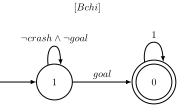

In [3]:
translator = LTLTranslator()
safety_aut = translate(translator, safety)

┌ Error: mktempdir cleanup
│   exception = (Base.IOError("unlink: resource busy or locked (EBUSY)", -4082), Union{Ptr{Nothing}, InterpreterIP}[Ptr{Nothing} @0x000000043a2de8d5, Ptr{Nothing} @0x000000043a2af057, Ptr{Nothing} @0x000000050b0f1794, Ptr{Nothing} @0x0000000036188f7b, Ptr{Nothing} @0x0000000036188be0, Ptr{Nothing} @0x000000003618934a, Ptr{Nothing} @0x000000043a292b96, Ptr{Nothing} @0x000000003618246c, Ptr{Nothing} @0x0000000036182a8d, Ptr{Nothing} @0x0000000036180eb4, Ptr{Nothing} @0x000000043a293fa6, Ptr{Nothing} @0x000000003617e2f4, Ptr{Nothing} @0x000000043a293fa6, Ptr{Nothing} @0x000000043a2a0d60, Ptr{Nothing} @0x000000043a2a11d9, Ptr{Nothing} @0x0000000036148347, Ptr{Nothing} @0x000000043a293fa6, Ptr{Nothing} @0x000000043a2a0d60, Ptr{Nothing} @0x000000043a2a11d9, Ptr{Nothing} @0x000000001530f945, Ptr{Nothing} @0x0000000015310627, Ptr{Nothing} @0x000000043a2924a5, Ptr{Nothing} @0x000000043a293fa6, Ptr{Nothing} @0x000000043a2af87e])
└ @ Base.Filesystem file.jl:587


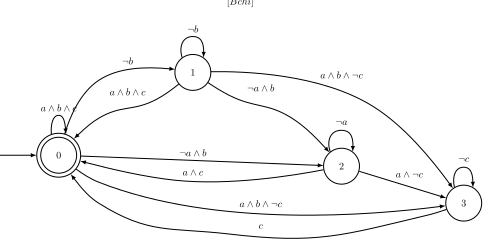

In [4]:
translator = LTLTranslator(buchi=true, deterministic=true, state_based_acceptance=true)
surveillance_aut = translate(translator, surveillance)

┌ Error: mktempdir cleanup
│   exception = (Base.IOError("unlink: resource busy or locked (EBUSY)", -4082), Union{Ptr{Nothing}, InterpreterIP}[Ptr{Nothing} @0x000000043a2de8d5, Ptr{Nothing} @0x000000043a2af057, Ptr{Nothing} @0x000000050b0f1794, Ptr{Nothing} @0x0000000036188f7b, Ptr{Nothing} @0x0000000036188be0, Ptr{Nothing} @0x000000003618934a, Ptr{Nothing} @0x000000043a292b96, Ptr{Nothing} @0x000000003618246c, Ptr{Nothing} @0x0000000036182a8d, Ptr{Nothing} @0x000000043a293fa6, Ptr{Nothing} @0x000000043a4129f5, Ptr{Nothing} @0x000000043a412863, Ptr{Nothing} @0x000000043a4132d0, Ptr{Nothing} @0x000000043a4139aa, InterpreterIP(CodeInfo(
1 ─ %1 = plot_automata(surveillance_aut)
└──      return %1
), 0x0000000000000000), Ptr{Nothing} @0x000000043a2c874e, Ptr{Nothing} @0x000000043a2c93b1, Ptr{Nothing} @0x000000003614978a, Ptr{Nothing} @0x0000000036147a2f, Ptr{Nothing} @0x000000043a293fa6, Ptr{Nothing} @0x000000043a2a0d60, Ptr{Nothing} @0x000000043a2a11d9, Ptr{Nothing} @0x000000001530f945, P

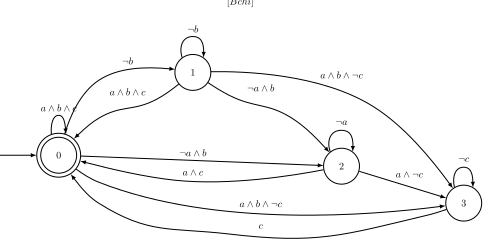

In [5]:
plot_automata(surveillance_aut)

## Deterministic Rabin Automata

Spot.jl provides a Deterministic Rabin Automata structure which is pure Julia. It can be constructed directly from a LTL formula.

In [6]:
# dra = DeterministicRabinAutomata(surveillance)
# nextstate(dra, 4, (:a,:b,:c))